In [92]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

In [93]:
db2 = "./data/run2.db"
db3 = "./data/run3.db"
titles =  ("v9_18","v9_27")

In [94]:
import sqlite3
conn2 = sqlite3.connect(db2)
conn3 = sqlite3.connect(db3)

In [95]:
sources = []
events = []
modules = []

for conn in [conn2, conn3]:
    c = conn.cursor()
    c.execute("SELECT name FROM sqlite_master WHERE type='table';")
    print(c.fetchall())
    TimeSource = pandas.read_sql_query("SELECT * from TimeSource", conn)
    sources.append(TimeSource)
    TimeEvent = pandas.read_sql_query("SELECT * from TimeEvent", conn)
    events.append(TimeEvent)
    TimeModule = pandas.read_sql_query("SELECT * from TimeModule", conn)
    modules.append(TimeModule)

[('TimeSource',), ('TimeEvent',), ('TimeModule',)]
[('TimeSource',), ('TimeEvent',), ('TimeModule',)]


In [96]:
print([type(x) for x in sources])

[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]


In [97]:
sources[0].head()

,Run,SubRun,Event,Source,Time
0,27094,100,1,MidasBankInput,0.000020
1,27094,100,2,MidasBankInput,0.000003
2,27094,100,3,MidasBankInput,0.000002
3,27094,100,4,MidasBankInput,0.000002
4,27094,100,5,MidasBankInput,0.000005


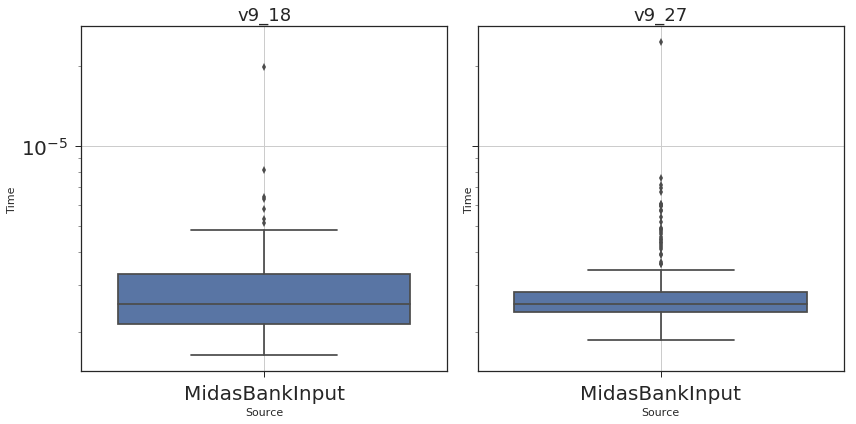

In [98]:
fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)

sns.boxplot(x="Source", y="Time", data=sources[0], ax = ax[0])
sns.boxplot(x="Source", y="Time", data=sources[1], ax = ax[1])

for axi, title in zip(ax, titles):
    axi.set_title(title,size=18)
    axi.set_yscale("log")
    axi.grid()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

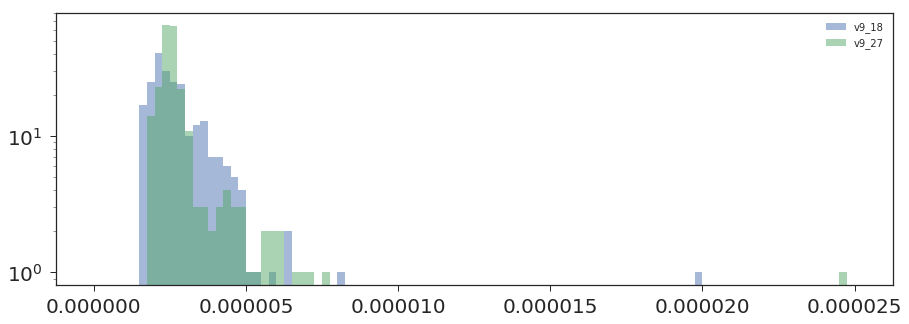

In [99]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(sources):
    plt.hist(ei['Time'], bins=100, range=(0,0.000025), alpha=0.5, label=titles[i])
plt.yscale('log')
plt.legend()
plt.show()

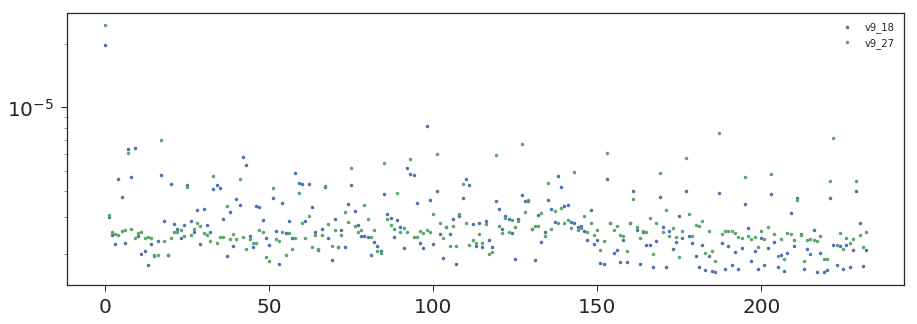

In [100]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(sources):
    plt.plot(ei['Time'], ".", label=titles[i])
plt.yscale('log')
plt.legend()
plt.show()

---

In [101]:
events[0].describe()

,Run,SubRun,Event,Time
count,233.0,233.0,233.000000,233.000000
mean,27094.0,100.0,129.266094,0.115845
std,0.0,0.0,78.564533,0.120278
min,27094.0,100.0,1.000000,0.002362
25%,27094.0,100.0,59.000000,0.003213
50%,27094.0,100.0,127.000000,0.051359
75%,27094.0,100.0,200.000000,0.220003
max,27094.0,100.0,259.000000,0.514059


In [102]:
events[1].describe()

,Run,SubRun,Event,Time
count,233.0,233.0,233.000000,233.000000
mean,27094.0,100.0,129.266094,0.099288
std,0.0,0.0,78.564533,0.102585
min,27094.0,100.0,1.000000,0.002349
25%,27094.0,100.0,59.000000,0.003002
50%,27094.0,100.0,127.000000,0.015320
75%,27094.0,100.0,200.000000,0.195603
max,27094.0,100.0,259.000000,0.375900


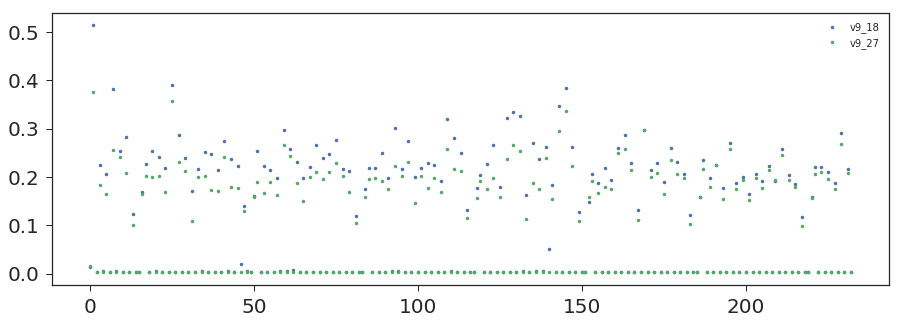

In [103]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(events):
    plt.plot(ei['Time'], ".", label=titles[i])
plt.legend()
plt.show()

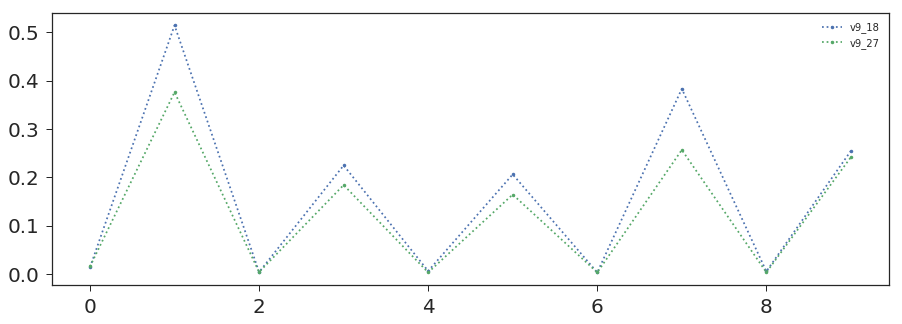

In [104]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(events):
    plt.plot(ei['Time'][:10], ".:", label=titles[i])
plt.legend()
plt.show()

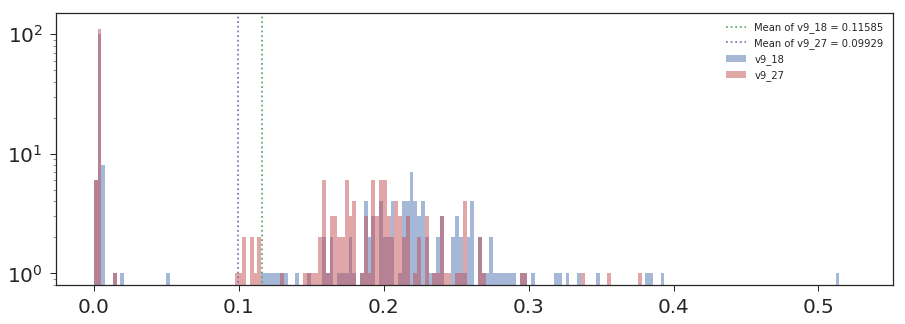

In [116]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(events):
    plt.hist(ei['Time'], bins=200, label=titles[i],alpha=0.5,range=(0,0.525))
    plt.plot([ei['Time'].mean(), ei['Time'].mean() ], [0.7,170], ":", label="Mean of "+str(titles[i])+" = "+str(round(ei['Time'].mean(),5) ))
plt.legend()
plt.ylim(0.8,150)
plt.yscale("log")
plt.show()

In [117]:
for i, ei in enumerate(events):
    print("Total time for all events in", titles[i],":", ei['Time'].sum(), "seconds" )
print("Saved time:", events[0]['Time'].sum() - events[1]['Time'].sum(), "seconds")

Total time for all events in v9_18 : 26.99198667 seconds
Total time for all events in v9_27 : 23.134212464 seconds
Saved time: 3.8577742059999984 seconds


---

In [107]:
modules[0].head()

,Run,SubRun,Event,Path,ModuleLabel,ModuleType,Time
0,27094,100,1,muonPath,fzInflater,FZInflater,0.005391
1,27094,100,1,muonPath,utcaUnpacker,UTCAUnpacker,0.000845
2,27094,100,1,muonPath,cccUnpacker,FC7Unpacker,0.001971
3,27094,100,1,muonPath,MuonFilter,CCCTriggerTypeFilter,0.000096
4,27094,100,1,muonPath,TriggerResults,TriggerResultInserter,0.005160


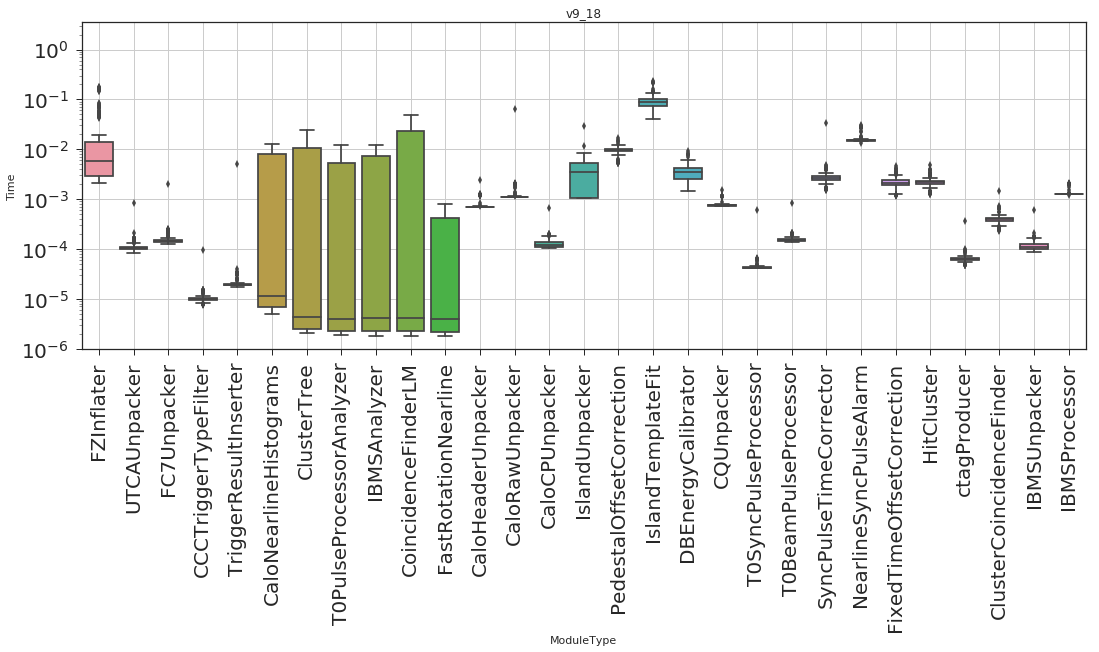

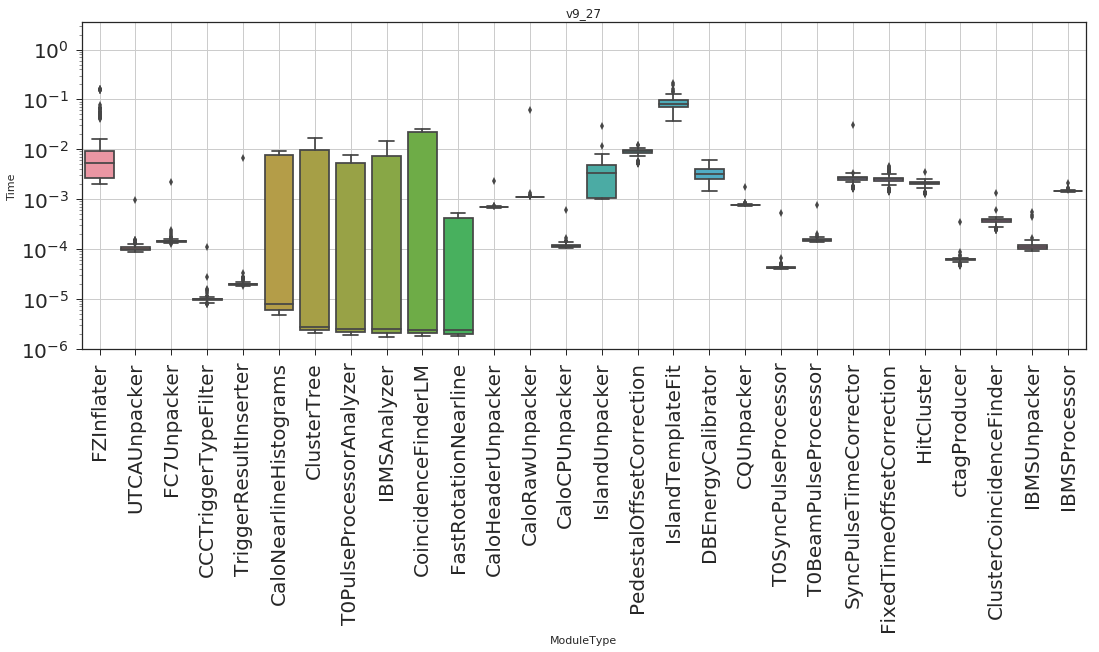

In [108]:
whichDB = 0

for whichDB in range(0,2):
    fig, ax = plt.subplots(figsize=(18,6))
    sns.boxplot(x="ModuleType", y="Time", data=modules[whichDB])
    plt.title(titles[whichDB])
    plt.xticks(rotation=90)
    plt.grid()
    plt.yscale('log')
    plt.ylim(10**(-6),3.5)
    plt.show()

No handles with labels found to put in legend.


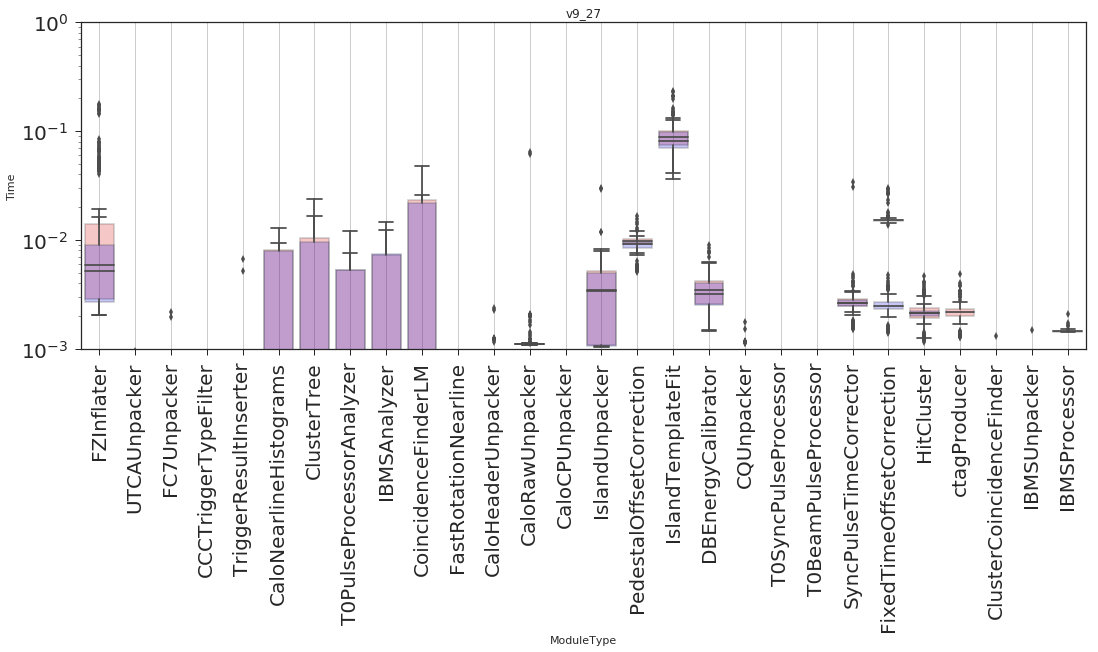

In [109]:
whichDB = 0

colors = ['red', 'blue']

fig, ax = plt.subplots(figsize=(18,6))
for whichDB in range(0,2):
    sns.boxplot(x="ModuleType", y="Time", data=modules[whichDB], color=colors[whichDB], boxprops=dict(alpha=.25, label='hi'))
    plt.title(titles[whichDB])
    plt.xticks(rotation=90)
    plt.grid()
    plt.yscale('log')
    plt.ylim(10**(-3),1)
plt.legend()
plt.show()

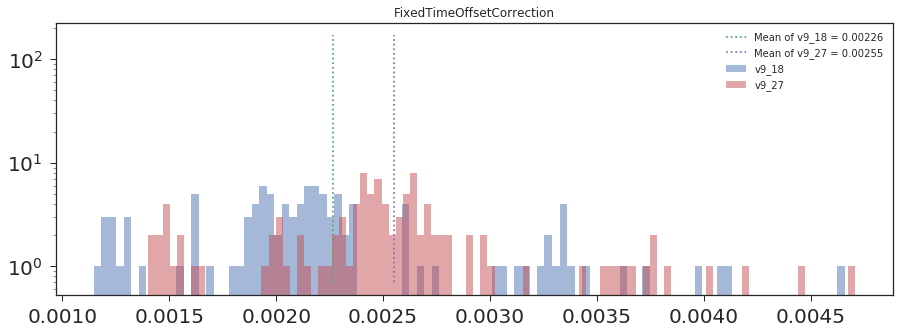

In [123]:
fig, ax = plt.subplots(figsize=(15,5))
#whichModule = 'IslandTemplateFit'
#whichModule = 'FZInflater'
whichModule = 'FixedTimeOffsetCorrection'
plt.title(whichModule)
for i, mi in enumerate(modules):
    #plt.hist( (mi.loc[mi['ModuleType'] == whichModule])['Time'], label=titles[i], alpha=0.5, bins=100, range=(0,0.5) )
    #plt.hist( (mi.loc[mi['ModuleType'] == whichModule])['Time'], label=titles[i], alpha=0.5, bins=100, range=(0,0.175) )
    plt.hist( (mi.loc[mi['ModuleType'] == whichModule])['Time'], label=titles[i], alpha=0.5, bins=100 )
    plt.plot([(mi.loc[mi['ModuleType'] == whichModule])['Time'].mean(), (mi.loc[mi['ModuleType'] == whichModule])['Time'].mean() ]
             , [0.7,170], ":", 
             label="Mean of "+str(titles[i])+" = "+str(round((mi.loc[mi['ModuleType'] == whichModule])['Time'].mean(),5) ))
plt.legend()
plt.yscale("log")
plt.show()